In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("IS310 Data.csv")

In [4]:
df

,game_name,YOR,operability_status,developer,publisher,gender,no_of_skintones,game_link
0,Bring It On,2005,operable,G-Game,Yahoo! Korea,F,1,https://ooooooooo.ooo/static/?e0f637b9-e5bd-41...
1,Alice in Wonderland,2007,operable,DressUpWho,DressUpWho,F,1,https://ooooooooo.ooo/static/?2bb5ed50-cf95-40...
2,Anime Character Maker 2,2009,operable,Xdanond,Kongregate,M/F,11,https://ooooooooo.ooo/static/?dba0d4ce-0747-85...
3,Beautiful Alice,2008,operable,AllForGirls,Kongregate,F,1,https://ooooooooo.ooo/static/?c65c45ab-7375-42...
4,Beach Doll Dress Up,2006,non-operable,www.roiworld.com,www.roiworld.com,F,1,https://ooooooooo.ooo/static/?92db83d9-1dce-49...
5,DKNY Spring 2008 2,2008,operable,Glorious Games Group AB,NaN,F,1,http://cdn.stardoll.com/flash/loader.swf?real_...
6,[S] June: Star in a Dress-Up Game Circa 2009,2009,operable,lavendersiren,Stardoll,F,1,http://pipe.miroware.io/609e0655a333fb12a3acf5...
7,50's Fashion Dress Up Game (2010),2010,operable,Pichichama,DeviantArt; Rinmaru Games,F,4,https://www.deviantart.com/pichichama/art/50-s...
8,Cover Model Dress Up: April,2010,non-operable,Spil Games,girlsgogames.com,F,1,https://flashpointproject.github.io/flashpoint...
9,2010 Teens Fashion Show,2010,operable,iGirlsGames,iGirlsGames,F,1,https://flashpointproject.github.io/flashpoint...


In [9]:
import pandas as pd
import logging
import csv
import os

# Configure logging
logging.basicConfig(filename='clean_IS310 Data.csv.log', level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')

def standardize_gender(gender):
    if pd.isna(gender):
        return 'Unknown'
    gender = gender.replace(',', '/').replace(' ', '').upper()
    if gender in ['M', 'F', 'M/F']:
        return gender
    return 'Other'

def standardize_operability(status):
    if pd.isna(status):
        return 'Unknown'
    status = status.lower()
    if 'operable' in status and 'non-operable' not in status:
        return 'Operable'
    elif 'non-operable' in status:
        return 'Non-operable'
    elif 'partially operable' in status:
        return 'Partially Operable'
    else:
        return 'Unknown'

def clean_game_link(link):
    if isinstance(link, str):
        return link.strip()
    return link

def inspect_csv_with_csv_module():
    try:
        with open('IS310 Data.csv', encoding='utf-8-sig') as f:
            reader = csv.reader(f, delimiter=',', quotechar='"')
            for i, row in enumerate(reader):
                print(f"Row {i}: {row}")
                if i >= 4:  # Inspect first 5 rows
                    break
    except FileNotFoundError:
        print("File 'dress_up_games.csv' not found.")
    except Exception as e:
        print(f"Error reading CSV with csv module: {e}")

def detect_invisible_characters():
    try:
        with open('IS310 Data.csv', 'rb') as f:
            content = f.read()
            # Check for non-printable characters except common ones (tab, newline, carriage return)
            non_printable = [byte for byte in content if byte < 32 and byte not in (9, 10, 13)]
            if non_printable:
                print(f"Non-printable characters detected: {non_printable}")
            else:
                print("No non-printable characters detected.")
    except FileNotFoundError:
        print("File 'dress_up_games.csv' not found.")
    except Exception as e:
        print(f"Error reading CSV for invisible characters: {e}")

def main():
    # Print the absolute path to ensure correct file is being read
    csv_path = 'IS310 Data.csv'
    absolute_csv_path = os.path.abspath(csv_path)
    print(f"Reading CSV from: {absolute_csv_path}\n")

    # Inspect the CSV first
    print("Inspecting CSV with csv.reader:")
    inspect_csv_with_csv_module()

    # Detect invisible characters
    print("\nDetecting invisible characters in CSV:")
    detect_invisible_characters()

    try:
        # Read the CSV with enhanced parameters
        df = pd.read_csv(
            'IS310 Data.csv',
            encoding='utf-8-sig',    # Handles BOM if present
            sep=',',
            quotechar='"',
            engine='python',          # More flexible parsing
            on_bad_lines='skip'       # Skip malformed lines
        )
        logging.info("Loaded 'dress_up_games.csv' successfully.")
        print("\nColumns Detected:", df.columns.tolist())  # Debugging line to check column names
    except FileNotFoundError:
        logging.error("File 'dress_up_games.csv' not found.")
        return
    except pd.errors.ParserError as e:
        logging.error(f"Pandas Parser Error: {e}")
        return
    except Exception as e:
        logging.error(f"Error loading CSV: {e}")
        return

    # Validate columns
    expected_columns = ['game_name', 'YOR', 'operability_status', 'developer', 'publisher', 'gender', 'no_of_skintones', 'game_link']
    missing_columns = [col for col in expected_columns if col not in df.columns]

    if missing_columns:
        print(f"Error: Missing columns in the CSV file: {missing_columns}")
        logging.error(f"Missing columns in the CSV file: {missing_columns}")
        exit(1)
    else:
        print("All expected columns are present.")
        logging.info("All expected columns are present.")

    # Display initial data info
    print("\nInitial Data Info:")
    print(df.info())
    print("\nInitial Data Sample:")
    print(df.head())

    # Standardize Column Names
    df.columns = [col.strip().upper().replace(' ', '_').replace('.', '') for col in df.columns]
    logging.info("Standardized column names.")
    print("\nStandardized Columns:", df.columns.tolist())  # Additional debugging

    # Handle Missing Values with Conditional Checks
    if 'DEVELOPER' in df.columns:
        df['DEVELOPER'] = df['DEVELOPER'].fillna('Unknown')
        logging.info("Filled missing values in 'DEVELOPER'.")
    else:
        logging.warning("'DEVELOPER' column not found in dataset.")

    if 'PUBLISHER' in df.columns:
        df['PUBLISHER'] = df['PUBLISHER'].fillna('Unknown')
        logging.info("Filled missing values in 'PUBLISHER'.")
    else:
        logging.warning("'PUBLISHER' column not found in dataset.")

    # Standardize 'GENDER'
    if 'GENDER' in df.columns:
        df['GENDER'] = df['GENDER'].apply(standardize_gender)
        logging.info("Standardized 'GENDER' column.")
    else:
        logging.warning("'GENDER' column not found in dataset.")

    # Handle 'NO_OF_SKINTONES'
    if 'NO_OF_SKINTONES' in df.columns:
        df['NO_OF_SKINTONES'] = pd.to_numeric(df['NO_OF_SKINTONES'], errors='coerce').fillna(0).astype(int)
        logging.info("Converted 'NO_OF_SKINTONES' to numeric.")
    else:
        logging.warning("'NO_OF_SKINTONES' column not found in dataset.")

    # Clean 'GAME_LINK'
    if 'GAME_LINK' in df.columns:
        df['GAME_LINK'] = df['GAME_LINK'].apply(clean_game_link)
        logging.info("Cleaned 'GAME_LINK' column.")
    else:
        logging.warning("'GAME_LINK' column not found in dataset.")

    # Standardize 'OPERABILITY_STATUS'
    if 'OPERABILITY_STATUS' in df.columns:
        df['OPERABILITY_STATUS'] = df['OPERABILITY_STATUS'].apply(standardize_operability)
        logging.info("Standardized 'OPERABILITY_STATUS' column.")
    else:
        logging.warning("'OPERABILITY_STATUS' column not found in dataset.")

    # Convert 'YOR' to integer
    if 'YOR' in df.columns:
        df['YOR'] = pd.to_numeric(df['YOR'], errors='coerce').fillna(0).astype(int)
        logging.info("Converted 'YOR' to integer.")
    else:
        logging.warning("'YOR' column not found in dataset.")

    # Remove duplicate entries based on 'GAME_NAME' and 'YOR'
    if 'GAME_NAME' in df.columns and 'YOR' in df.columns:
        before_dedup = len(df)
        df = df.drop_duplicates(subset=['GAME_NAME', 'YOR'])
        after_dedup = len(df)
        logging.info(f"Removed duplicates: {before_dedup - after_dedup} entries dropped.")
    else:
        logging.warning("Cannot remove duplicates because 'GAME_NAME' or 'YOR' columns are missing.")

    # Reset index
    df.reset_index(drop=True, inplace=True)

    # Display cleaned data info
    print("\nCleaned Data Info:")
    print(df.info())
    print("\nCleaned Data Sample:")
    print(df.head())

    # Save the cleaned dataset
    try:
        df.to_csv('cleaned_dress_up_games.csv', index=False)
        logging.info("Cleaned data saved to 'cleaned_dress_up_games.csv'.")
        print("\nCleaned data saved to 'cleaned_dress_up_games.csv'")
    except Exception as e:
        logging.error(f"Error saving cleaned CSV: {e}")

if __name__ == "__main__":
    main()

Reading CSV from: /Users/ellislee/Desktop/IS310 Final/IS310 Data.csv

Inspecting CSV with csv.reader:
Row 0: ['game_name', 'YOR', 'operability_status', 'developer', 'publisher', 'gender', 'no_of_skintones', 'game_link']
Row 1: ['Bring It On', '2005', 'operable', 'G-Game', 'Yahoo! Korea', 'F', '1', 'https://ooooooooo.ooo/static/?e0f637b9-e5bd-41b6-a61d-309633a932d4']
Row 2: ['Alice in Wonderland', '2007', 'operable', 'DressUpWho', 'DressUpWho', 'F', '1', 'https://ooooooooo.ooo/static/?2bb5ed50-cf95-4081-8134-55bf7d697601']
Row 3: ['Anime Character Maker 2', '2009', 'operable', 'Xdanond', 'Kongregate', 'M/F', '11', 'https://ooooooooo.ooo/static/?dba0d4ce-0747-8515-442e-97025e222493']
Row 4: ['Beautiful Alice', '2008', 'operable', 'AllForGirls', 'Kongregate', 'F', '1', 'https://ooooooooo.ooo/static/?c65c45ab-7375-42d1-8b59-52d45c2d0c4f']

Detecting invisible characters in CSV:
No non-printable characters detected.

Columns Detected: ['game_name', 'YOR', 'operability_status', 'developer', 

Columns in dataset: Index(['GAME_NAME', 'YOR', 'OPERABILITY_STATUS', 'DEVELOPER', 'PUBLISHER',
       'GENDER', 'NO_OF_SKINTONES', 'GAME_LINK'],
      dtype='object')
Plotting: Number of Games Released by Year


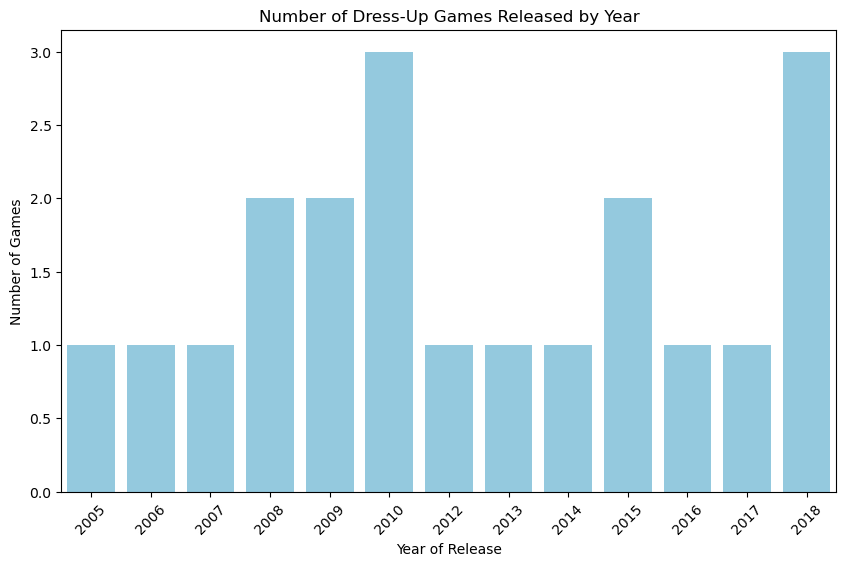

Plotting: Distribution of Skin Tones


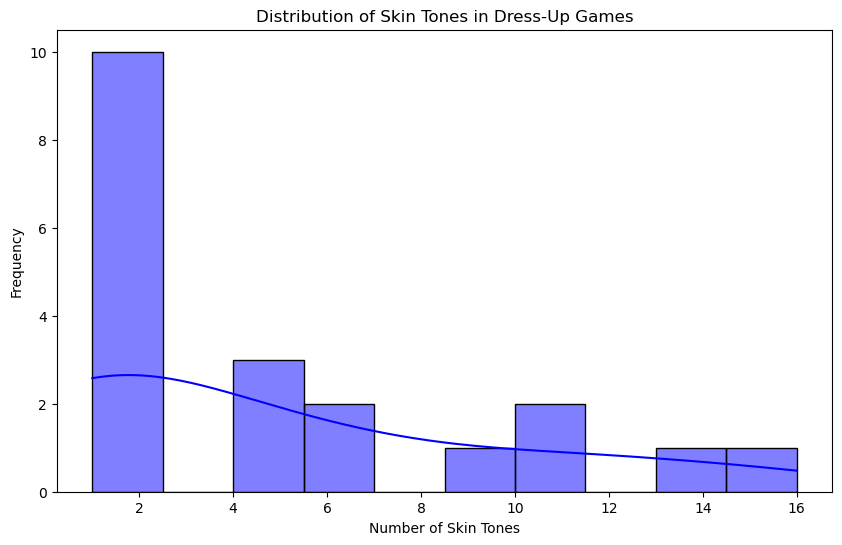

Plotting: Number of Games by Developer


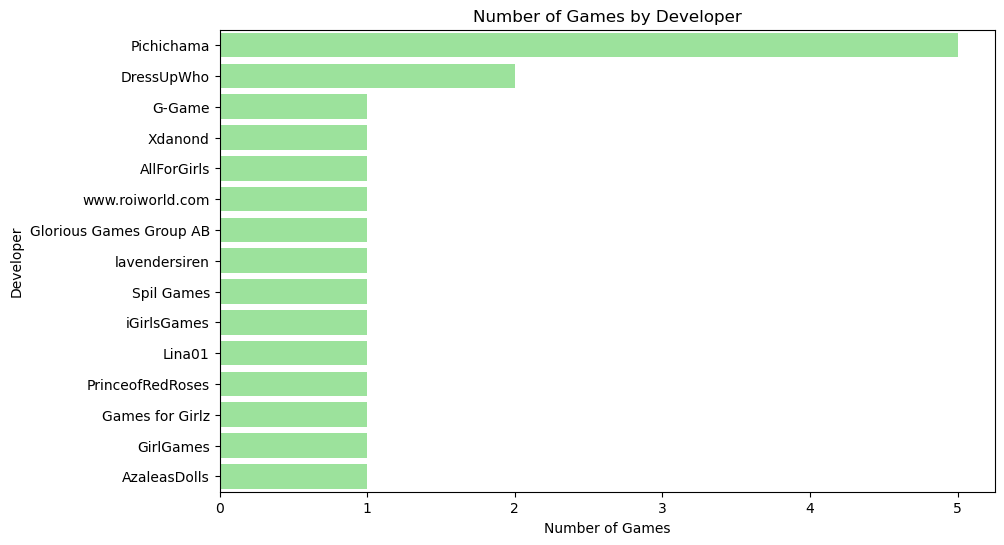

Plotting: Gender Representation


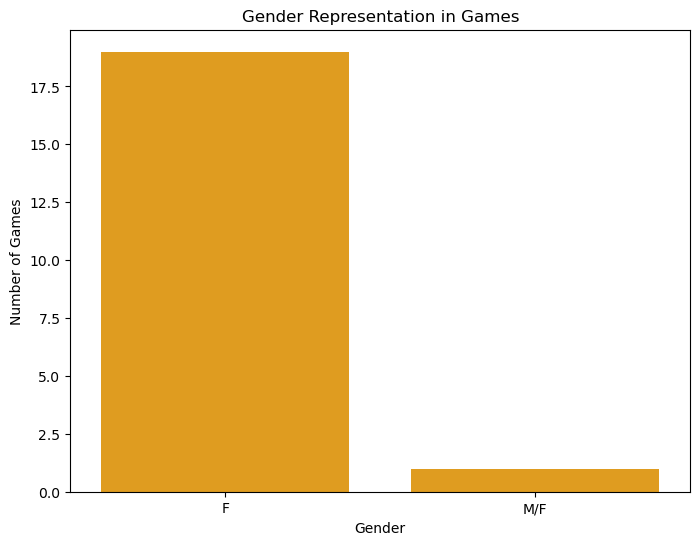

Plotting: Skin Tones Over Time


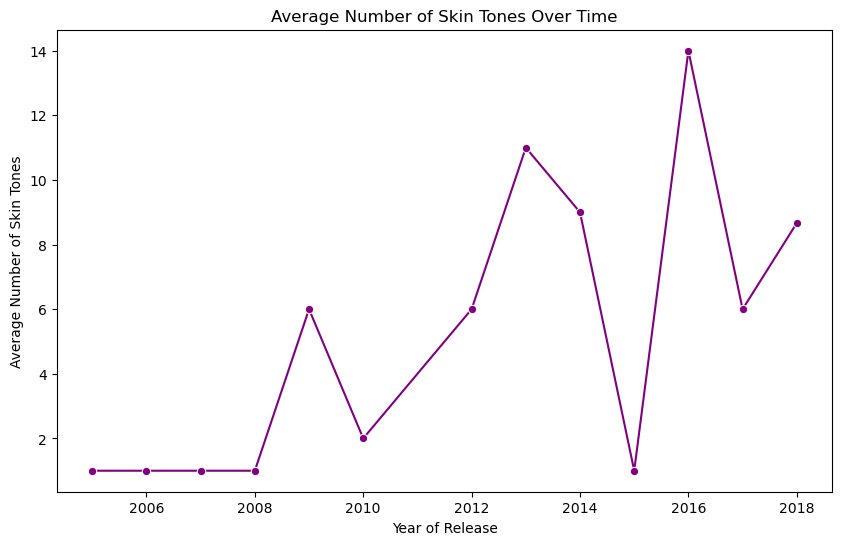

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_data(file_path):
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return

    print("Columns in dataset:", df.columns)

    # Number of games released by year
    if 'YOR' in df.columns:
        print("Plotting: Number of Games Released by Year")
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x='YOR', color='skyblue')
        plt.title('Number of Dress-Up Games Released by Year')
        plt.xlabel('Year of Release')
        plt.ylabel('Number of Games')
        plt.xticks(rotation=45)
        plt.show()

    # Distribution of skin tones
    if 'NO_OF_SKINTONES' in df.columns:
        print("Plotting: Distribution of Skin Tones")
        plt.figure(figsize=(10, 6))
        sns.histplot(df['NO_OF_SKINTONES'], bins=10, kde=True, color='blue')
        plt.title('Distribution of Skin Tones in Dress-Up Games')
        plt.xlabel('Number of Skin Tones')
        plt.ylabel('Frequency')
        plt.show()

    # Number of games by developer
    if 'DEVELOPER' in df.columns:
        print("Plotting: Number of Games by Developer")
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, y='DEVELOPER', order=df['DEVELOPER'].value_counts().index, color='lightgreen')
        plt.title('Number of Games by Developer')
        plt.xlabel('Number of Games')
        plt.ylabel('Developer')
        plt.show()

    # Gender representation
    if 'GENDER' in df.columns:
        print("Plotting: Gender Representation")
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x='GENDER', color='orange')
        plt.title('Gender Representation in Games')
        plt.xlabel('Gender')
        plt.ylabel('Number of Games')
        plt.show()

    # Skin tones over time
    if 'NO_OF_SKINTONES' in df.columns and 'YOR' in df.columns:
        print("Plotting: Skin Tones Over Time")
        yearly_skin_tones = df.groupby('YOR')['NO_OF_SKINTONES'].mean().reset_index()
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=yearly_skin_tones, x='YOR', y='NO_OF_SKINTONES', marker='o', color='purple')
        plt.title('Average Number of Skin Tones Over Time')
        plt.xlabel('Year of Release')
        plt.ylabel('Average Number of Skin Tones')
        plt.show()

if __name__ == "__main__":
    visualize_data("cleaned_dress_up_games.csv")
